# Guided Projects Artificial Intelligence & Machine Learning
## Guided Projects: Feature Engineering
### Speech Classification
Linear Discriminant Analysis or LDA is a dimensionality reduction technique used to 
reduce the number of dimensions (i.e. variables) in a dataset while retaining as much 
information as possible. Using LDA based classification, we can find discriminative features 
for a given audio segment to achieve the task of Automatic Speech Classification such that 
speech belonging to the same class are close together, but samples from different classes 
are far apart from each other.
### Question:
In order to implement LDA, first generate a dummy dataset (say IRIS dataset having 4 
features) and the use LDA to decrease the number of features to one/two. Now using this 
modified dataset, try to learn a classifier to test the performance of LDA for dimensionality 
reduction

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from mpl_toolkits import mplot3d

In [5]:
iris = datasets.load_iris() # iris data set
X = iris.data
y = iris.target
print(iris.keys())
features=iris.feature_names
target_names = iris.target_names
print(features)
print(target_names)
colors = ['navy', 'turquoise', 'darkorange']

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
['setosa' 'versicolor' 'virginica']


## Ploting data in 3D

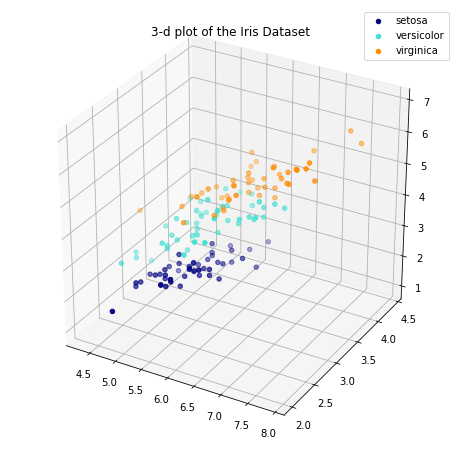

In [6]:
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111, projection='3d')
plt.title("3-d plot of the Iris Dataset")
for color, i, target_name in zip(colors, [0, 1, 2], target_names):
    ax.scatter(X[y == i, 0], X[y == i, 1],X[y == i, 2], color = color,
                label = target_name)
plt.legend(loc='best')
plt.show()    

## Ploting different attribute of data to check which contribute more

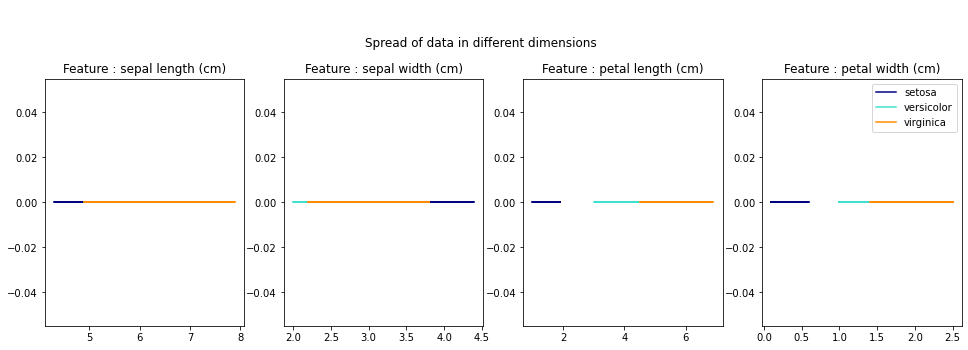

In [7]:
# Create figure
fig = plt.figure(figsize=(25, 10))
fig.suptitle("\n\nSpread of data in different dimensions" )

# Plot results
for j in range(4):
    ax = fig.add_subplot(2, 6, 2 + j + (j >3))
    for color, i, target_name in zip(colors, [0, 1, 2], target_names):
        ax.set_title("Feature : %s" %(features[j]))
        ax.plot(X[y == i, j],np.zeros_like(X[y == i, j]), color=color,label=target_name)
plt.legend(loc='best')
plt.show()

In [8]:
# Split into train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [9]:
# Use a Decision Tree classifier to evaluate the methods
tree = DecisionTreeClassifier(criterion='entropy')

In [10]:
tree.fit(X_train,y_train)
acc = tree.score(X_test,y_test)
print("Without LDA",acc)

Without LDA 0.9555555555555556


In [11]:
lda2 = LinearDiscriminantAnalysis(n_components=2) # model for reduction in 2D
lda1 = LinearDiscriminantAnalysis(n_components=1) # model for reduction in 1D

## Checking Accuracy after reducing data to 2D

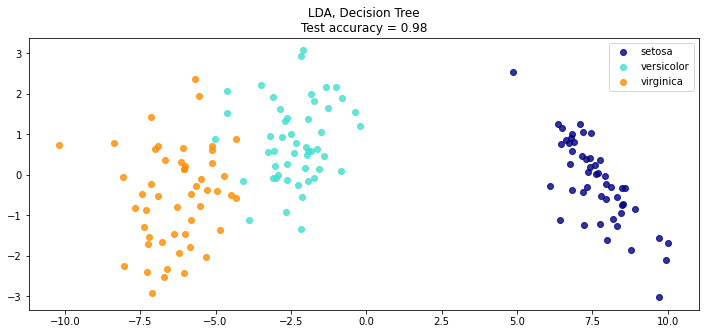

In [12]:
# Fit the method's model
lda2.fit(X_train, y_train)

# Fit a Decision Tree classifier on the embedded training set
tree.fit(lda2.transform(X_train), y_train)

# Compute the Decision Tree accuracy on the embedded test set
acc = tree.score(lda2.transform(X_test), y_test)
X_2 = lda2.transform(X)
plt.figure(figsize=(12,5))
for color, i, target_name in zip(colors, [0, 1, 2], target_names):
    plt.scatter(X_2[y == i, 0], X_2[y == i, 1], alpha=.8, color=color,
                label=target_name)
plt.legend(loc='best')
plt.title("LDA, Decision Tree\nTest accuracy = {:.2f}".format(acc))
plt.show()

## Checking Accuracy after reducing data to 1D

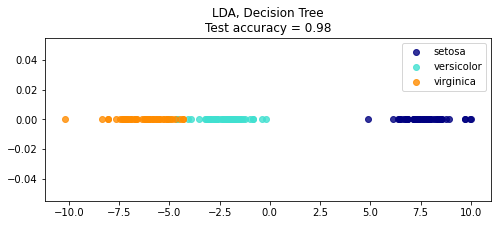

In [13]:
# Fit the method's model
lda1.fit(X_train, y_train)

# Fit a Decision Tree classifier on the embedded training set
tree.fit(lda1.transform(X_train), y_train)

# Compute the Decision Tree accuracy on the embedded test set
acc = tree.score(lda1.transform(X_test), y_test)
X_1 = lda1.transform(X)
plt.figure(figsize=(8,3))
for color, i, target_name in zip(colors, [0, 1, 2], target_names):
    plt.scatter(X_1[y == i, 0],np.zeros_like(X[y == i, j]), alpha=.8, color=color,
                label=target_name)
plt.legend(loc='best')
plt.title("LDA, Decision Tree\nTest accuracy = {:.2f}".format(acc))
plt.show()